We will try to predict if stock market will go up or down tomorrow

In [23]:
# Imports part 
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score

In [3]:
# Download price history
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period = "max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,0.0,0.0
2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,0.0,0.0
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,0.0,0.0


The price of sp500 for a day

In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-01-16 00:00:00-05:00', '2024-01-17 00:00:00-05:00',
               '2024-01-18 00:00:00-05:00', '2024-01-19 00:00:00-05:00',
               '2024-01-22 00:00:00-05:00', '2024-01-23 00:00:00-05:00',
               '2024-01-24 00:00:00-05:00', '2024-01-25 00:00:00-05:00',
               '2024-01-26 00:00:00-05:00', '2024-01-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24134, freq=None)

Cleaning    

<Axes: xlabel='Date'>

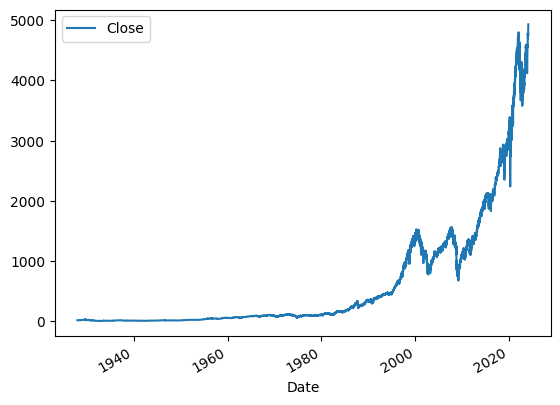

In [8]:
# plot the closing price against the index
sp500.plot.line(y="Close", use_index=True)

In [9]:
del sp500["Dividends"]

In [10]:
del sp500["Stock Splits"]

In [11]:
#Setup target 
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805
2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,4894.160156
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,4890.970215


In [13]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1
2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,4894.160156,1
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,4890.970215,0


In [16]:
# Lets clear the history data 
sp500 = sp500.loc["1990-01-01":].copy()

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1
2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,4894.160156,1
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,4890.970215,0


Training initial model 

In [34]:
#RFC
model = RandomForestClassifier(n_estimators=200, min_samples_split=100,random_state=1)

In [35]:
#Train test data
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [36]:
preds = model.predict(test[predictors])

In [37]:
import pandas as pd
preds = pd.Series(preds,index=test.index)

In [38]:
precision_score(test["Target"],preds)

0.5306122448979592

In [39]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

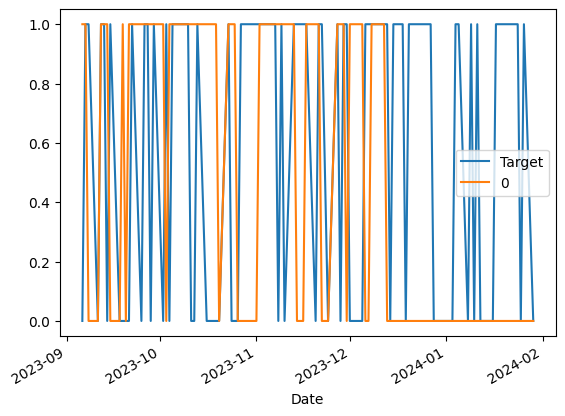

In [41]:
combined.plot()

In [42]:
#Building a backtesting system 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [43]:
def backtest(data, model, predictors, start = 2500 , step = 250):
    all_predictions = []
    
    for i in range (start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [44]:
predictions = backtest(sp500, model, predictors)

In [45]:
predictions["Predictions"].value_counts()

Predictions
0    3455
1    2629
Name: count, dtype: int64

In [46]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5264359071890453

In [47]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.534681
0    0.465319
Name: count, dtype: float64

In [63]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [65]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [66]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,ratio_column,trend_column,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,1.176082,512.0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,1.172676,512.0,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.176163,513.0,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.183537,514.0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,1.181856,513.0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1,1.218169,529.0,1.001459,2.0,1.010302,4.0,1.059365,40.0,1.122424,137.0,1.218169,529.0
2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,4894.160156,1,1.218664,529.0,1.000406,2.0,1.005719,5.0,1.057419,41.0,1.122453,138.0,1.218664,529.0
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,4890.970215,0,1.224585,529.0,1.002623,2.0,1.006302,5.0,1.060001,42.0,1.127490,138.0,1.224585,529.0


In [67]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [68]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [69]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [70]:
predictions = backtest(sp500, model, new_predictors)

In [71]:
predictions["Predictions"].value_counts()


Predictions
0.0    4252
1.0     832
Name: count, dtype: int64

In [72]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5733173076923077

In [73]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1    0.544453
0    0.455547
Name: count, dtype: float64

In [74]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-01-23 00:00:00-05:00,1,0.0
2024-01-24 00:00:00-05:00,1,0.0
2024-01-25 00:00:00-05:00,0,0.0
